# Week 2: Day 3 PM // Algorithm Chains and Pipelines

## Import Libraries & Data Loading

In [1]:
# Import Libraries

!pip install mglearn
import mglearn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=2ba26bd82d60c1ca67865df5a455bd3a8cd8d1808428ec8de27ce4761a1358a3
  Stored in directory: c:\users\naufal\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [2]:
# Data Loading

df = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
df['target'] = load_breast_cancer().target
df_copy = df.copy()
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Data Preprocessing

In [3]:
# Split between `X` and `y`

X = df.drop('target', axis=1)
y = df['target']
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Split Dataset into Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Traning

In [8]:
# Model Traning

svm = SVC()
svm.fit(X_train_scaled, y_train)

print("Train score: {:.2f}".format(svm.score(X_train_scaled, y_train)))
print("Test score: {:.2f}".format(svm.score(X_test, y_test)))

Train score: 0.98
Test score: 0.37


c:\Users\Naufal\anaconda3\envs\streamlit_envi\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [9]:
# Check Accuracy of Test-Set using `X_test_scaled`

print("Train score: {:.2f}".format(svm.score(X_train_scaled, y_train)))
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Train score: 0.98
Test score: 0.97


---
## Review of MinMaxScaler

Let's review `MinMaxScaler` before we continue find the mistake.

In [10]:
# Example Min Max

example_data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
example_scaler = MinMaxScaler().fit(example_data)

print(example_scaler.transform(example_data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [11]:
# Display `X_train`

X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.060,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.980,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.500,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.180,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.014060,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [12]:
# Display `X_train_scaled` from MinMaxScaler

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns.tolist())
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.230442,0.321577,0.219404,0.122672,0.337678,0.126841,0.062980,0.113320,0.411616,0.151432,...,0.182497,0.365938,0.169032,0.081744,0.434062,0.144085,0.105112,0.314847,0.302779,0.098583
1,0.200625,0.421162,0.194527,0.103415,0.573151,0.165776,0.011729,0.037689,0.444444,0.217355,...,0.144077,0.366738,0.131979,0.061664,0.470382,0.067332,0.010663,0.069652,0.340430,0.066772
2,0.622320,0.769295,0.604036,0.474019,0.490605,0.287720,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.560799,0.198502,0.074315
3,0.312793,0.337344,0.293345,0.181888,0.291626,0.072392,0.046790,0.061531,0.259091,0.110362,...,0.269299,0.375267,0.241546,0.136134,0.223404,0.047472,0.084665,0.178608,0.151784,0.049784
4,0.459511,0.435270,0.437496,0.302906,0.242641,0.177180,0.085497,0.114662,0.396970,0.069292,...,0.400213,0.387527,0.382937,0.220901,0.196328,0.256823,0.197843,0.300965,0.613444,0.138987


[Text(0.5, 1.0, 'After MaxMinScaler, Mean Radius'), Text(0, 0.5, 'Frequency')]

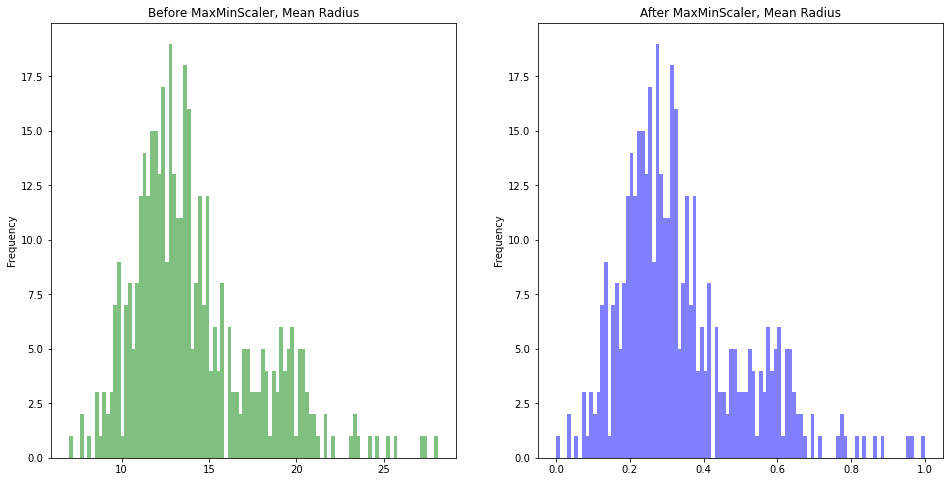

In [13]:
# Compare Before and After MinMaxScaler

x1 = X_train['mean radius'].tolist()
x2 = X_train_scaled['mean radius'].tolist()

kwargs = dict(alpha=0.5, bins=100)

plt.figure(figsize=(16, 8)) 
plt.subplot(1,2,1)
plt.hist(x1, **kwargs, color='g', label='old')
plt.gca().set(title='Before MaxMinScaler, Mean Radius', ylabel='Frequency')
plt.subplot(1,2,2)
plt.hist(x2, **kwargs, color='b', label='new')
plt.gca().set(title='After MaxMinScaler, Mean Radius', ylabel='Frequency')

### Parameter Selection with Preprocessing 

In [14]:
%%time
from sklearn.model_selection import GridSearchCV
# for illustration purposes only, don't use this code!
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test_scaled, y_test)))

Best cross-validation accuracy: 0.98
Best parameters:  {'C': 1, 'gamma': 1}
Test set accuracy: 0.97
CPU times: total: 1.52 s
Wall time: 1.54 s


c:\Users\Naufal\anaconda3\envs\streamlit_envi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


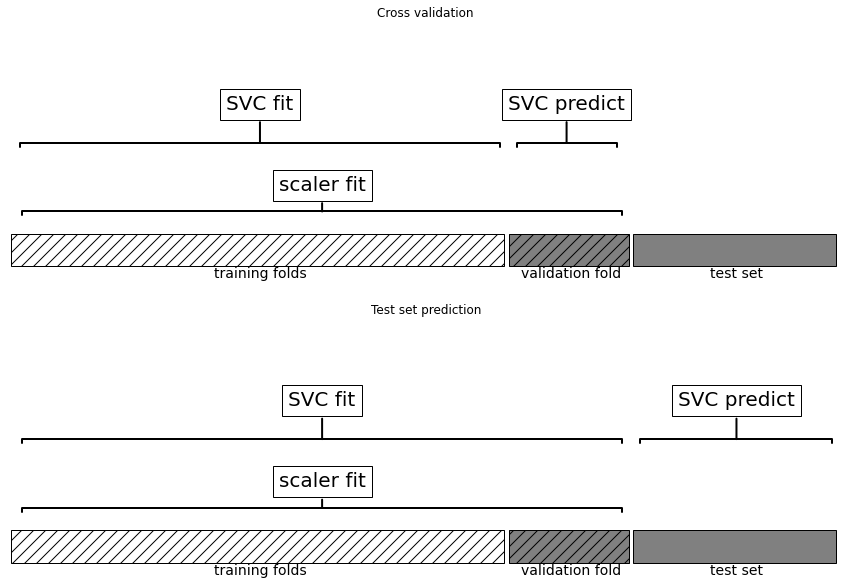

In [15]:
mglearn.plots.plot_improper_processing()

### Building Pipelines

In [16]:
from sklearn.pipeline import Pipeline
scaler = MinMaxScaler()
clf = SVC()
pipe = Pipeline([("scaler", scaler), ("svm", clf)])

In [ ]:
# pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [17]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [18]:
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.97


In [19]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### Using Pipelines in Grid-searches

In [20]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("clf", SVC())])

param_grid = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'clf__C': 1, 'clf__gamma': 1}


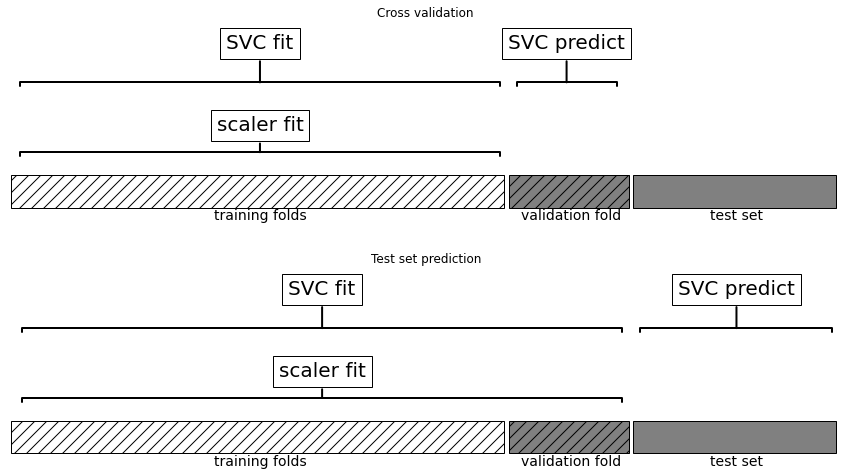

In [21]:
mglearn.plots.plot_proper_processing()

### The General Pipeline Interface

In [22]:
def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        # iterate over all but the final step
        # fit and transform the data
        X_transformed = estimator.fit_transform(X_transformed, y)
    # fit the last step
    self.steps[-1][1].fit(X_transformed, y)
    return self

In [23]:
def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        # iterate over all but the final step
        # transform the data
        X_transformed = step[1].transform(X_transformed)
    # predict using the last step
    return self.steps[-1][1].predict(X_transformed)

### Convenient Pipeline creation with ``make_pipeline``

In [24]:
from sklearn.pipeline import Pipeline, make_pipeline
# standard syntax
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
pipe_long.steps

[('scaler', MinMaxScaler()), ('svm', SVC(C=100))]

In [25]:
# abbreviated syntax
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))
print("Pipeline steps:\n{}".format(pipe_short.steps))

Pipeline steps:
[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [26]:
# example if multiple steps have the same class
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("Pipeline steps:\n{}".format(pipe.steps))

Pipeline steps:
[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


#### Accessing Attributes in a Pipeline inside GridSearchCV

In [27]:
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.steps

[('standardscaler', StandardScaler()),
 ('logisticregression', LogisticRegression(max_iter=1000))]

In [28]:
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [29]:
# load and split the data

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=4)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [30]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])


In [31]:
lr = grid.best_estimator_.named_steps["logisticregression"]

In [32]:
scaler = grid.best_estimator_.named_steps["standardscaler"]
scaler.transform(cancer.data)

array([[ 1.11491297, -2.03449436,  1.28751646, ...,  2.31707382,
         2.77113274,  1.95337338],
       [ 1.85614078, -0.33675539,  1.70728339, ...,  1.10604329,
        -0.2501468 ,  0.3082897 ],
       [ 1.60331889,  0.46272115,  1.58675625, ...,  1.97542289,
         1.15847786,  0.22900856],
       ...,
       [ 0.7155693 ,  2.03180873,  0.68488077, ...,  0.4318928 ,
        -1.11849943, -0.28741999],
       [ 1.86475971,  2.31897703,  2.00652318, ...,  2.31097291,
         1.93216047,  2.23416076],
       [-1.82414149,  1.21854811, -1.82457735, ..., -1.7308796 ,
        -0.05264554, -0.71741006]])

In [33]:
pipe = grid.best_estimator_
pipe.predict(cancer.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [34]:
print("Logistic regression coefficients:\n{}".format(
      grid.best_estimator_.named_steps["logisticregression"].coef_))

Logistic regression coefficients:
[[-0.43570655 -0.34266946 -0.40809443 -0.5344574  -0.14971847  0.61034122
  -0.72634347 -0.78538827  0.03886087  0.27497198 -1.29780109  0.04926005
  -0.67336941 -0.93447426 -0.13939555  0.45032641 -0.13009864 -0.10144273
   0.43432027  0.71596578 -1.09068862 -1.09463976 -0.85183755 -1.06406198
  -0.74316099  0.07252425 -0.82323903 -0.65321239 -0.64379499 -0.42026013]]
